https://github.com/GorkemKola/Bitcoin-Price-Prediction/blob/main/BitcoinPricePrediction/BitcoinPricePrediction.ipynb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error, r2_score
import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
# def AUC(true_test,prediction_test):
#     true_test = np.array(true_test)
#     prediction_test = np.array(prediction_test)
#     count = 0
#     for i in range(1,len(true_test)):
#         if (true_test[i] - true_test[i-1]) * (prediction_test[i] - prediction_test[i-1]) > 0:
#             count += 1
#     return count/(len(true_test)-1)

def metric(true, predict):
  #RMSE
  print("Root Mean Square Error (RMSE):", np.sqrt(mean_squared_error(true, predict)))
  #MAPE
  print("Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(true,predict))
  # #AUC
  # print("AUC test:",AUC(true,predict))
  # r2
  print("r2 score:", r2_score(true,predict))
  print()

def plot(true, predict, date):
    D = pd.DataFrame()
    D['Date'] = date
    D['Obs'] = true
    D['Sim'] = predict
    D = D.sort_values('Date').reset_index().drop(columns = 'index')

    fig = plt.figure(figsize = (20,10))
    plt.plot(D['Date'], D['Obs'].values, label = 'Obs', linewidth=3)
    plt.plot(D['Date'], D['Sim'] , label = 'Sim', linewidth=3)
    # plt.title('%s'%k)
    plt.legend(fontsize=25)
    plt.xticks(fontsize = 30)
    plt.yticks(fontsize =30)
    # plt.savefig('/content/drive/MyDrive/Tài liệu học tập/Machine learning/Project/Result/Manhattan/Manhattan_k_'+str(k)+'.png')
    plt.show()

### **Loading data**

In [3]:
url = 'https://raw.githubusercontent.com/lavibula/ML20222.PredictionBitcoin/main/data/data.csv'
df = pd.read_csv(url, sep = ',')

In [4]:
df

,Date,BTC_close,BTC_open,BTC_high,BTC_low,difficulty,addresses_active_count,sum_lock_weight,mean_lock_size_ytes,total_fees_usd,...,ETH,LTC,XRP,DOGE,COPPER,GOLD,SILVER,SPX,JP225,DJI
0,2023-06-22,29890.5,29992.8,30497.8,29590.4,52350439455487,1000988,547153915,1.650655e+06,1.292778e+06,...,1872.32,85.97,0.49401,0.065567,3.8900,1923.70,22.467,4381.89,33445.0,34210.0
1,2023-06-21,29996.9,28307.7,30769.5,28270.5,52350439455487,920555,483181576,1.611773e+06,1.347976e+06,...,1889.87,85.12,0.49995,0.065644,3.9135,1944.90,22.810,4365.69,33390.0,34235.0
2,2023-06-20,28307.7,26845.9,28393.0,26665.5,52350439455487,951926,543133484,1.677592e+06,1.052364e+06,...,1791.61,80.31,0.49270,0.063108,3.8835,1947.70,23.234,4388.71,33155.0,34356.0
3,2023-06-19,26845.9,26339.7,27029.7,26295.1,52350439455487,920552,567091224,1.758290e+06,8.514319e+05,...,1737.06,77.51,0.49341,0.062429,3.8643,1964.05,24.062,0.00,0.0,0.0
4,2023-06-18,26339.7,26515.0,26679.3,26290.6,52350439455487,883864,603064705,1.985675e+06,7.946708e+05,...,1720.98,77.20,0.48699,0.062107,3.8738,1969.45,24.198,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2656,2016-03-14,414.3,412.4,416.1,411.2,158427203767,451902,437739524,7.199663e+05,1.689298e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0
2657,2016-03-13,412.4,410.4,415.9,409.6,158427203767,421585,334817852,6.293569e+05,1.460678e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0
2658,2016-03-12,410.4,419.1,420.7,407.0,158427203767,374730,331208848,5.750154e+05,1.398444e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0
2659,2016-03-11,419.1,415.8,422.4,415.1,158427203767,434658,398582424,6.227850e+05,1.710193e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df = df.sort_values('Date').reset_index().drop(columns = 'index')

In [7]:
df.head()

,Date,BTC_close,BTC_open,BTC_high,BTC_low,difficulty,addresses_active_count,sum_lock_weight,mean_lock_size_ytes,total_fees_usd,...,ETH,LTC,XRP,DOGE,COPPER,GOLD,SILVER,SPX,JP225,DJI
0,2016-03-10,415.8,412.8,417.5,410.3,158427203767,445273,426654988,688153.206452,17312.723752,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-03-11,419.1,415.8,422.4,415.1,158427203767,434658,398582424,622785.037500,17101.930760,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016-03-12,410.4,419.1,420.7,407.0,158427203767,374730,331208848,575015.361111,13984.439830,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-03-13,412.4,410.4,415.9,409.6,158427203767,421585,334817852,629356.864662,14606.780891,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016-03-14,414.3,412.4,416.1,411.2,158427203767,451902,437739524,719966.322368,16892.976657,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###### shifting

In [8]:
df['BTC_close'] = df["BTC_close"][1:].reset_index(drop=True)
df = df.dropna()

In [9]:
df

,Date,BTC_close,BTC_open,BTC_high,BTC_low,difficulty,addresses_active_count,sum_lock_weight,mean_lock_size_ytes,total_fees_usd,...,ETH,LTC,XRP,DOGE,COPPER,GOLD,SILVER,SPX,JP225,DJI
0,2016-03-10,419.1,412.8,417.5,410.3,158427203767,445273,426654988,6.881532e+05,1.731272e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0
1,2016-03-11,410.4,415.8,422.4,415.1,158427203767,434658,398582424,6.227850e+05,1.710193e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0
2,2016-03-12,412.4,419.1,420.7,407.0,158427203767,374730,331208848,5.750154e+05,1.398444e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0
3,2016-03-13,414.3,410.4,415.9,409.6,158427203767,421585,334817852,6.293569e+05,1.460678e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0
4,2016-03-14,415.1,412.4,416.1,411.2,158427203767,451902,437739524,7.199663e+05,1.689298e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,2023-06-17,26339.7,26341.3,26767.3,26183.5,52350439455487,863600,559141195,1.724510e+06,1.041701e+06,...,1727.79,76.87,0.47940,0.062193,0.0000,0.00,0.000,0.00,0.0,0.0
2656,2023-06-18,26845.9,26515.0,26679.3,26290.6,52350439455487,883864,603064705,1.985675e+06,7.946708e+05,...,1720.98,77.20,0.48699,0.062107,3.8738,1969.45,24.198,0.00,0.0,0.0
2657,2023-06-19,28307.7,26339.7,27029.7,26295.1,52350439455487,920552,567091224,1.758290e+06,8.514319e+05,...,1737.06,77.51,0.49341,0.062429,3.8643,1964.05,24.062,0.00,0.0,0.0
2658,2023-06-20,29996.9,26845.9,28393.0,26665.5,52350439455487,951926,543133484,1.677592e+06,1.052364e+06,...,1791.61,80.31,0.49270,0.063108,3.8835,1947.70,23.234,4388.71,33155.0,34356.0


### **Correlation**

In [10]:
df.corr()

<ipython-input-10-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,BTC_close,BTC_open,BTC_high,BTC_low,difficulty,addresses_active_count,sum_lock_weight,mean_lock_size_ytes,total_fees_usd,mean_hash_rate,...,ETH,LTC,XRP,DOGE,COPPER,GOLD,SILVER,SPX,JP225,DJI
BTC_close,1.000000,0.997253,0.997996,0.997786,0.625341,0.659433,0.001944,0.472203,0.369477,0.620417,...,0.932976,0.746369,0.680427,0.800160,0.311931,0.216839,0.252035,0.319041,0.237628,0.263332
BTC_open,0.997253,1.000000,0.999402,0.998903,0.626092,0.657424,-0.000561,0.471327,0.370903,0.620866,...,0.936217,0.748643,0.684309,0.805319,0.312726,0.216692,0.251810,0.319650,0.237975,0.263868
BTC_high,0.997996,0.999402,1.000000,0.998769,0.622867,0.660447,0.003008,0.471490,0.376160,0.617412,...,0.935004,0.751718,0.684940,0.805151,0.315988,0.219595,0.255261,0.322470,0.241061,0.266740
BTC_low,0.997786,0.998903,0.998769,1.000000,0.630633,0.654110,-0.004214,0.471943,0.361251,0.625963,...,0.937966,0.744498,0.682525,0.804130,0.309198,0.213955,0.248292,0.316266,0.234030,0.260337
difficulty,0.625341,0.626092,0.622867,0.630633,1.000000,0.590128,0.010106,0.751663,0.101419,0.988774,...,0.617652,0.292910,0.299077,0.464148,0.271921,0.273565,0.240532,0.301677,0.230753,0.257651
addresses_active_count,0.659433,0.657424,0.660447,0.654110,0.590128,1.000000,0.551396,0.696671,0.507936,0.598712,...,0.545417,0.574961,0.466297,0.409891,0.470388,0.455775,0.454233,0.484029,0.444593,0.455196
sum_lock_weight,0.001944,-0.000561,0.003008,-0.004214,0.010106,0.551396,1.000000,0.461150,0.357968,0.051971,...,-0.082512,0.116324,0.003007,-0.107314,0.251111,0.276279,0.282136,0.231628,0.261601,0.243552
mean_lock_size_ytes,0.472203,0.471327,0.471490,0.471943,0.751663,0.696671,0.461150,1.000000,0.251563,0.730502,...,0.410389,0.295991,0.235382,0.314559,0.376467,0.391644,0.361986,0.393247,0.352160,0.368770
total_fees_usd,0.369477,0.370903,0.376160,0.361251,0.101419,0.507936,0.357968,0.251563,1.000000,0.091973,...,0.202675,0.599462,0.452824,0.188054,0.153713,0.116438,0.163547,0.132328,0.150446,0.128717
mean_hash_rate,0.620417,0.620866,0.617412,0.625963,0.988774,0.598712,0.051971,0.730502,0.091973,1.000000,...,0.614924,0.292306,0.296528,0.451406,0.264427,0.265735,0.232198,0.292086,0.221699,0.248765


<ipython-input-11-c1be2daee4ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


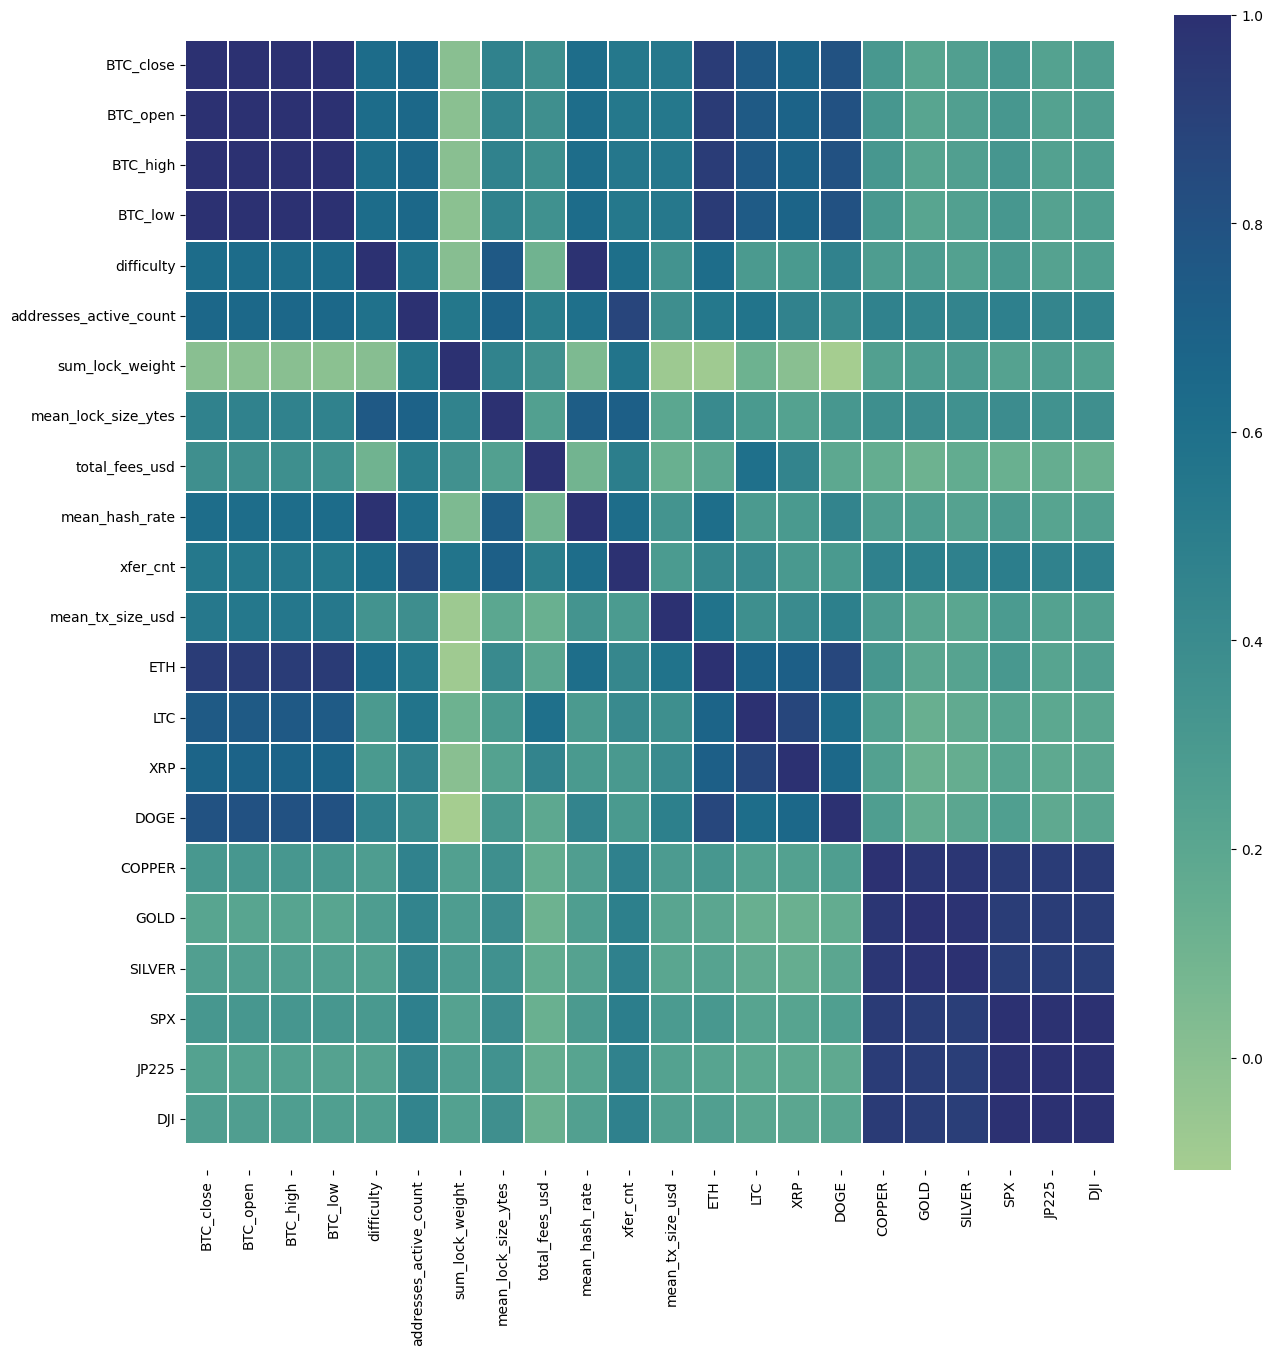

In [11]:
correlation_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(correlation_matrix, linewidths =.01, cmap = 'crest',linecolor='white',annot_kws={"size":8},ax=ax)
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top - 0.5)
plt.show()

### **Normalization**

- a process that important in KNN - an algorithm that prediction based on calculating distance between data points.
- normalization: change all units and magnitudes to only one range to avoid bias to any features.
- In my programming, I choose MinMaxScaling method to normalize the data.

- formulas of Min Max Scaling: x_normalized = (x - min(x)) / (max(x) - min(x)
> scale data to a fixed range, between 0 and 1

In [12]:
scaler = MinMaxScaler()
df1 = df.drop("Date", axis = 1, inplace = False).drop("BTC_close", axis = 1, inplace = False)
X = df1.copy()
scaled = scaler.fit_transform(X)
display(scaled)

array([[6.85334585e-05, 1.02070426e-04, 1.24369055e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.13229192e-04, 1.73519724e-04, 1.97170452e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.62394499e-04, 1.48731192e-04, 7.43180936e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.86342474e-01, 3.88147582e-01, 3.92718040e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.93884134e-01, 4.08026527e-01, 3.98335881e-01, ...,
        9.14970312e-01, 9.85289747e-01, 9.36768916e-01],
       [4.15662875e-01, 4.42679436e-01, 4.22678849e-01, ...,
        9.10171039e-01, 9.92273403e-01, 9.33469666e-01]])

### **Split data**

In [13]:
type

type

In [14]:
# df2 = pd.DataFrame(scaled)
# train_size = int(len(df2)*70/100)
# test_size = int(len(df2)*15/100) + 1
# train, test, valid = df2.iloc[0:train_size,:], df2.iloc[-test_size:,:], df2.iloc[train_size:len(df1)-test_size,:]
# X_train = np.array(train.iloc[:,:])
# Y_train = df['BTC_close'][:train_size]
# X_test = np.array(test.iloc[:,:])
# Y_test = df['BTC_close'][-test_size:]
# X_valid = np.array(valid.iloc[:,:])
# Y_valid = df['BTC_close'][train_size:len(df1)-test_size]

In [15]:
# 70/15/15
Y = pd.DataFrame()
Y = df['BTC_close']
X_train, X_test, Y_train, Y_test = train_test_split(scaled, Y, test_size=0.15, random_state=0,shuffle=False)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=15/85, random_state=0, shuffle=False)
train_date, test_date = train_test_split(df['Date'], test_size=0.15, random_state=0,shuffle=False)
train_date, valid_date = train_test_split(train_date, test_size=15/85, random_state=0,shuffle=False)

In [16]:
X_train.shape

(1862, 21)

In [17]:
test_date.shape

(399,)

In [18]:
train_date.shape


(1862,)

In [19]:
Y_train

0         419.1
1         410.4
2         412.4
3         414.3
4         415.1
         ...   
1857    59978.7
1858    59863.8
1859    63540.9
1860    62980.4
1861    63216.0
Name: BTC_close, Length: 1862, dtype: float64

In [20]:
# train_date = np.array(df['Date'][:train_size])
# valid_date = np.array(df['Date'][train_size: -test_size])
# test_date =  np.array(df['Date'][-test_size:])

In [21]:
print("x_train:",X_train.shape), print("y_train: ",Y_train.shape)
print("x_valid: ",X_valid.shape), print("y_valid: ",Y_valid.shape)
print("x_test: ",X_test.shape), print("y_test: ",Y_test.shape)

x_train: (1862, 21)
y_train:  (1862,)
x_valid:  (399, 21)
y_valid:  (399,)
x_test:  (399, 21)
y_test:  (399,)


(None, None)

In [22]:
test_date

2261   2022-05-19
2262   2022-05-20
2263   2022-05-21
2264   2022-05-22
2265   2022-05-23
          ...    
2655   2023-06-17
2656   2023-06-18
2657   2023-06-19
2658   2023-06-20
2659   2023-06-21
Name: Date, Length: 399, dtype: datetime64[ns]

# **Default**

In [23]:
neighbors = KNN()
neighbors.fit(X_train, Y_train)

KNeighborsRegressor()

#### **train set**

Metric:
Root Mean Square Error (RMSE): 1189.7755157073054
Mean Absolute Percentage Error (MAPE): 0.06210912197016214
r2 score: 0.9877486132744745

Visualization:


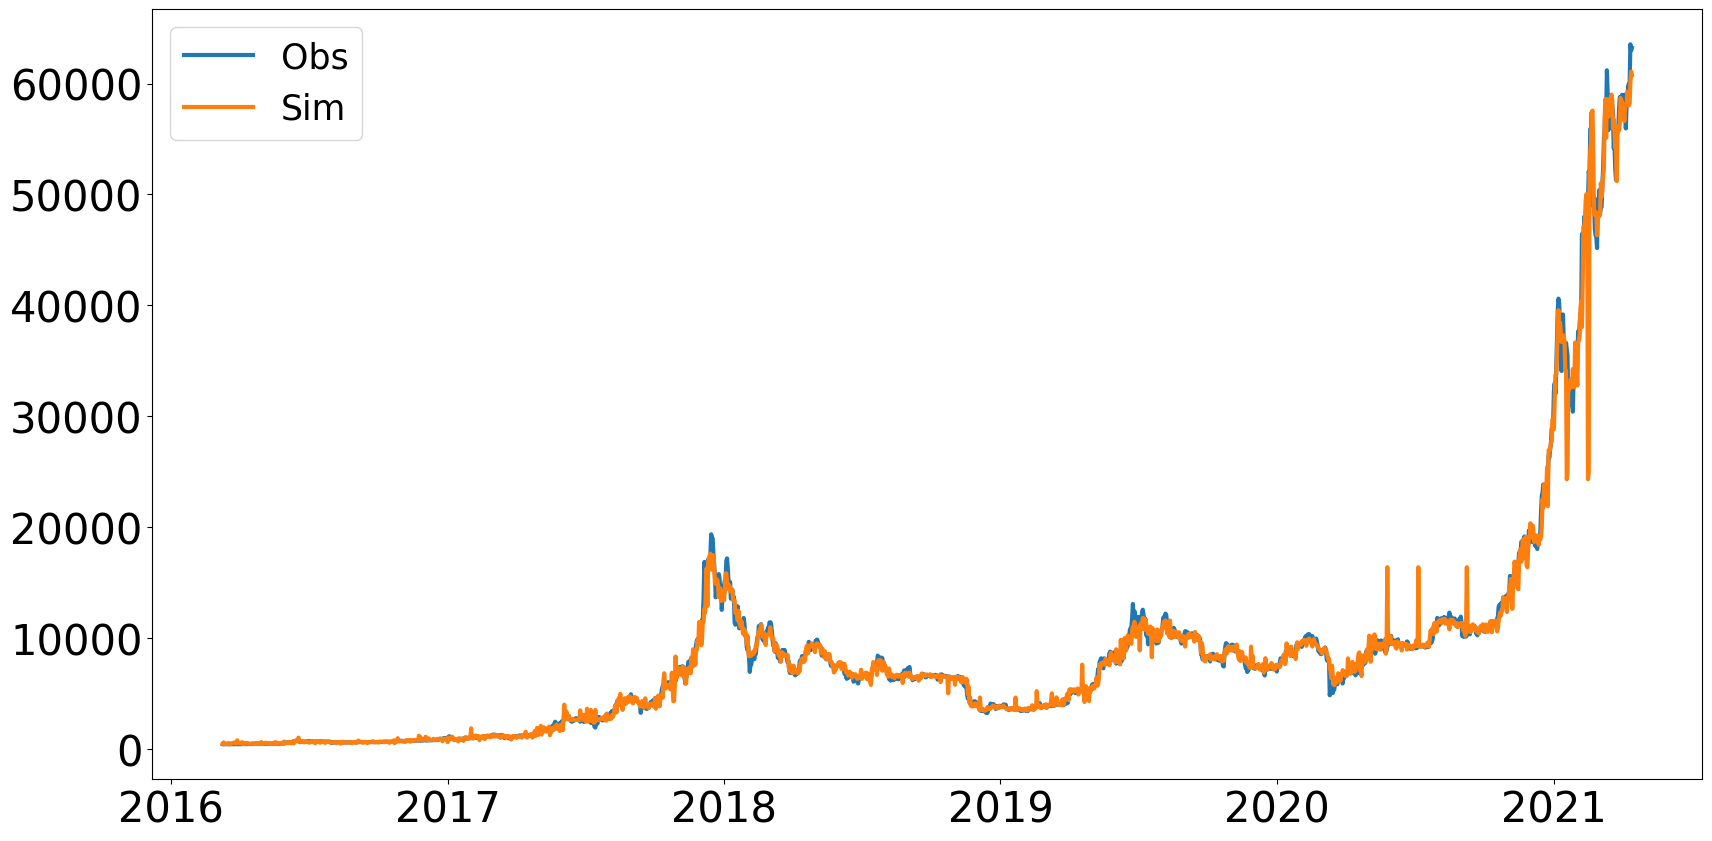

In [24]:
true_train = Y_train.copy()
prediction_train = neighbors.predict(X_train)

print('Metric:')
metric(true_train, prediction_train)
print('Visualization:')
plot(true_train, prediction_train, train_date)

### **test set**

Metric:
Root Mean Square Error (RMSE): 4463.541439633704
Mean Absolute Percentage Error (MAPE): 0.15995712199168668
r2 score: -0.11914980881558401

Visualization:


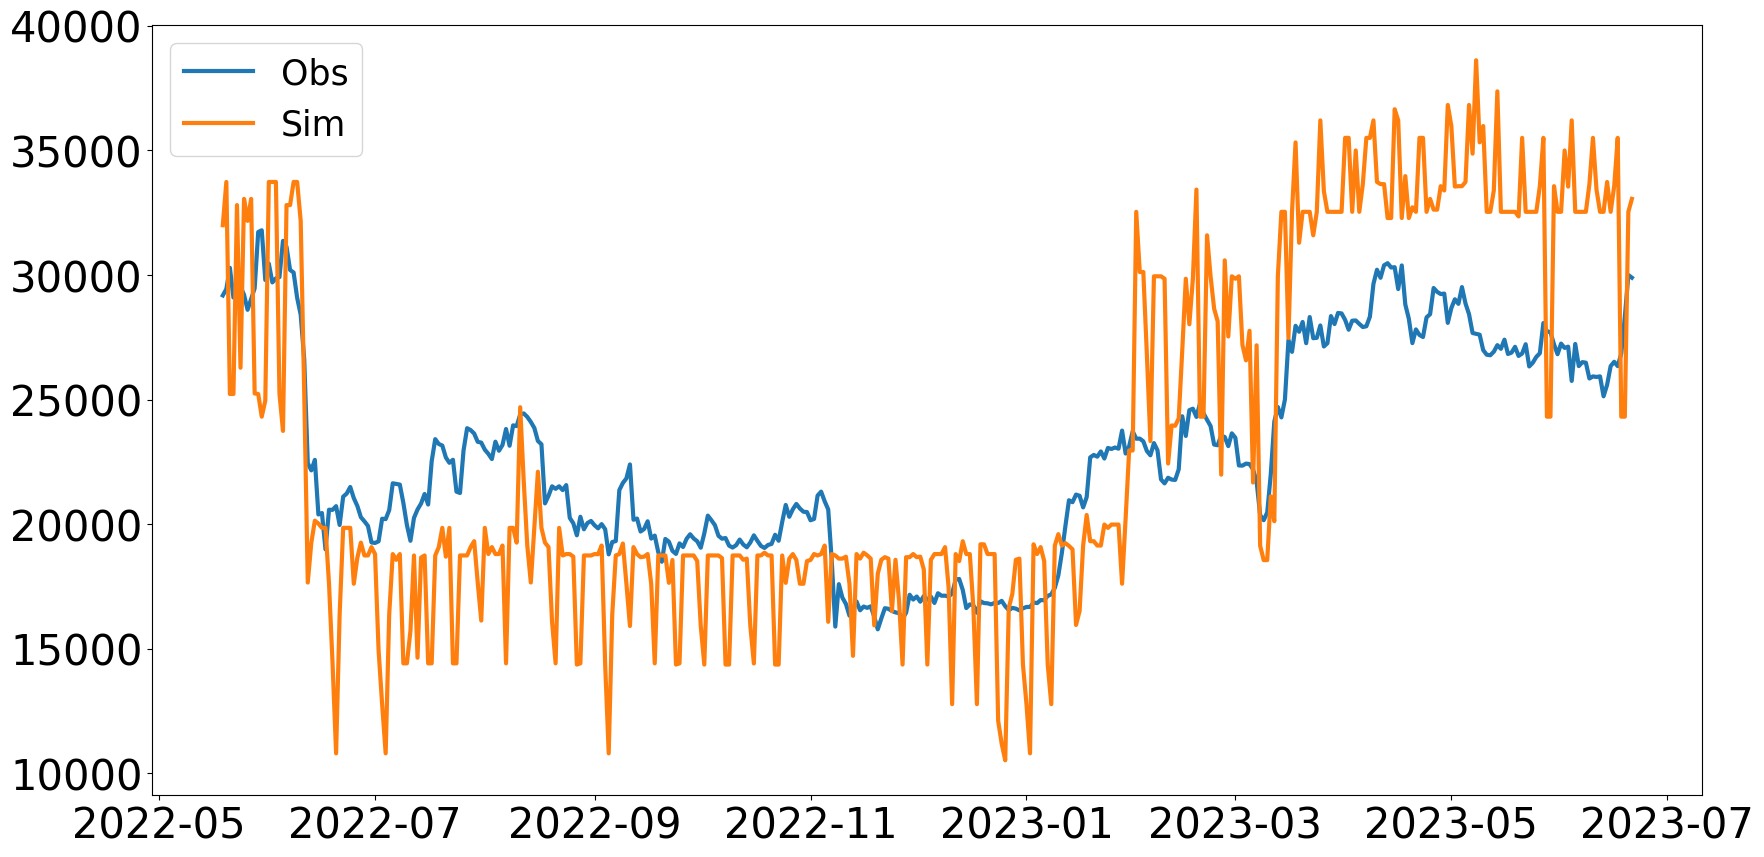

In [25]:
true_test = Y_test.copy()
prediction_test = neighbors.predict(X_test)

print('Metric:')
metric(true_test, prediction_test)
print('Visualization:')
plot(true_test, prediction_test, test_date)

# **Hyperparameters tuning**

2 hyperparameters of KNN:
- n_neighbors
- p

## **Tuning by function & graph**

### **Find the optimal k using function**

In [26]:
# Elbow function to find the minimum MSE index
def elbow(X_train,Y_train,X_valid,Y_valid,p):
    error_rate = []
    for i in range(1,40):
        neighbors = KNN(n_neighbors=i,p=p)
        neighbors.fit(X_train, Y_train)
        prediction_knn = neighbors.predict(X_valid)
        result = mean_squared_error(Y_valid,prediction_knn)
        error_rate.append(result)
    min_error = min(error_rate)
    optimal = error_rate.index(min_error)
    return optimal+1

In [27]:
# Elbow function to find the minimum MSE index
def elbow(X_train,Y_train,X_valid,Y_valid,p):
    error_rate = []
    for i in range(1,40):
        neighbors = KNN(n_neighbors=i,p=p)
        neighbors.fit(X_train, Y_train)
        prediction_knn = neighbors.predict(X_valid)
        result = mean_absolute_percentage_error(Y_valid,prediction_knn)
        error_rate.append(result)
    min_error = min(error_rate)
    optimal = error_rate.index(min_error)
    return optimal+1

In [28]:
# p = 1 -> Manhattan distance
print("(L1)Optimal value for k is: ",elbow(X_train,Y_train,X_test,Y_test,1))
# p = 2 -> Euclidean distance
print("(L2)Optimal value for k is: ",elbow(X_train,Y_train,X_test,Y_test,2))

(L1)Optimal value for k is:  18
(L2)Optimal value for k is:  29


In [29]:
# p = 1 -> Manhattan distance
print("(L1)Optimal value for k is: ",elbow(X_train,Y_train,X_test,Y_test,1))
# p = 2 -> Euclidean distance
print("(L2)Optimal value for k is: ",elbow(X_train,Y_train,X_test,Y_test,2))

(L1)Optimal value for k is:  18
(L2)Optimal value for k is:  29


### **Find the optimal k using graph**

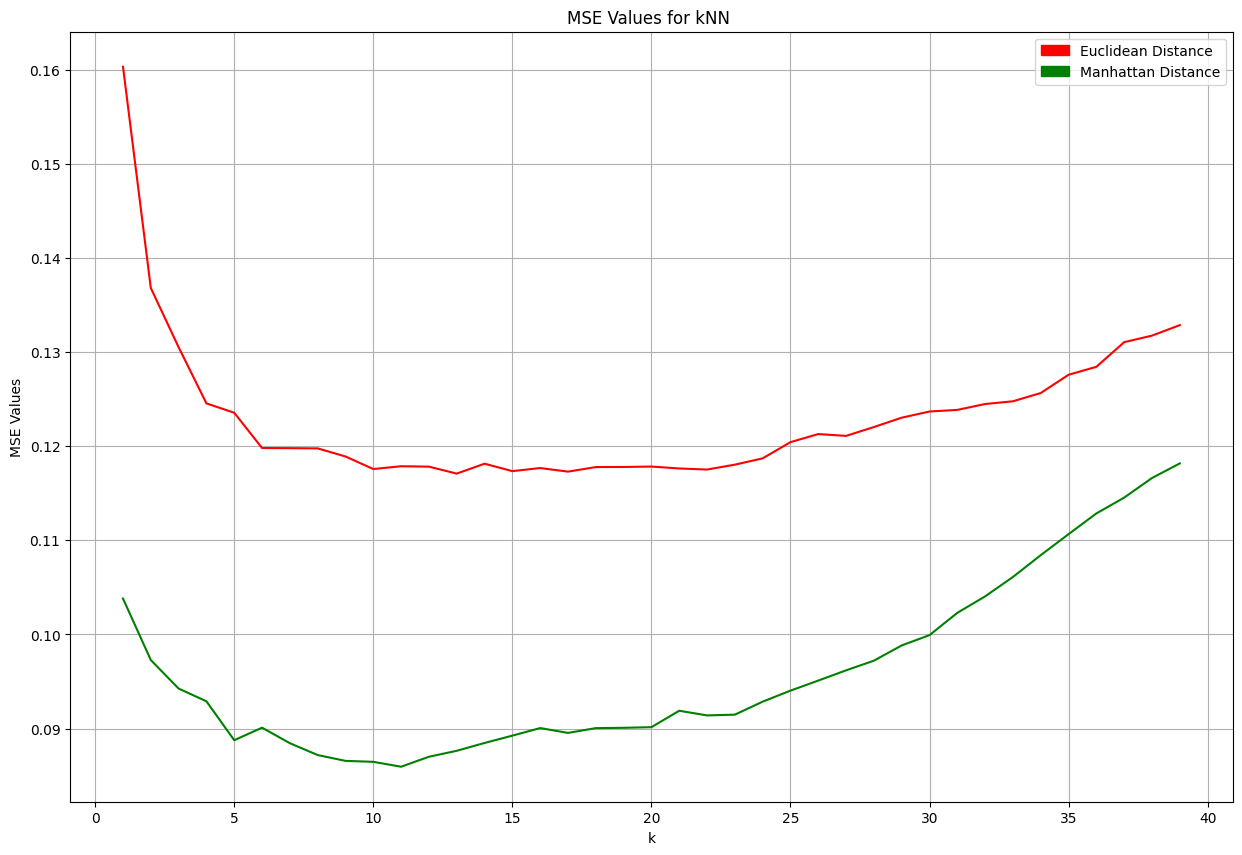

In [30]:
# Elbow function to plot a graph.

def graph(x_train,y_train,X_valid,Y_valid,p):
    error_rate = []
    for i in range(1,40):
        neighbors = KNN(n_neighbors=i,p=p)
        neighbors.fit(X_train, Y_train)
        prediction_knn = neighbors.predict(X_valid)
        error_rate.append(mean_absolute_percentage_error(Y_valid,prediction_knn))
    return error_rate
K = range(1,40)
plt.figure(figsize=(15, 10))
plt.plot(K, graph(X_train,Y_train,X_valid,Y_valid,2) ,color='r')
plt.plot(K, graph(X_train,Y_train,X_valid,Y_valid,1) ,color='g')
plt.xlabel('k')
plt.ylabel('MSE Values')
plt.title('MSE Values for kNN ')
red_patch = mpatches.Patch(color='r', label='Euclidean Distance')
green_patch = mpatches.Patch(color='g', label='Manhattan Distance')
plt.legend(handles=[red_patch,green_patch])
plt.grid()
plt.show()

The best hyperparameters:

### **Manhattan distance**

Root Mean Square Error (RMSE): 926.5190030085786
Mean Absolute Percentage Error (MAPE): 0.07006857046505807
r2 score: 0.9925704269605704



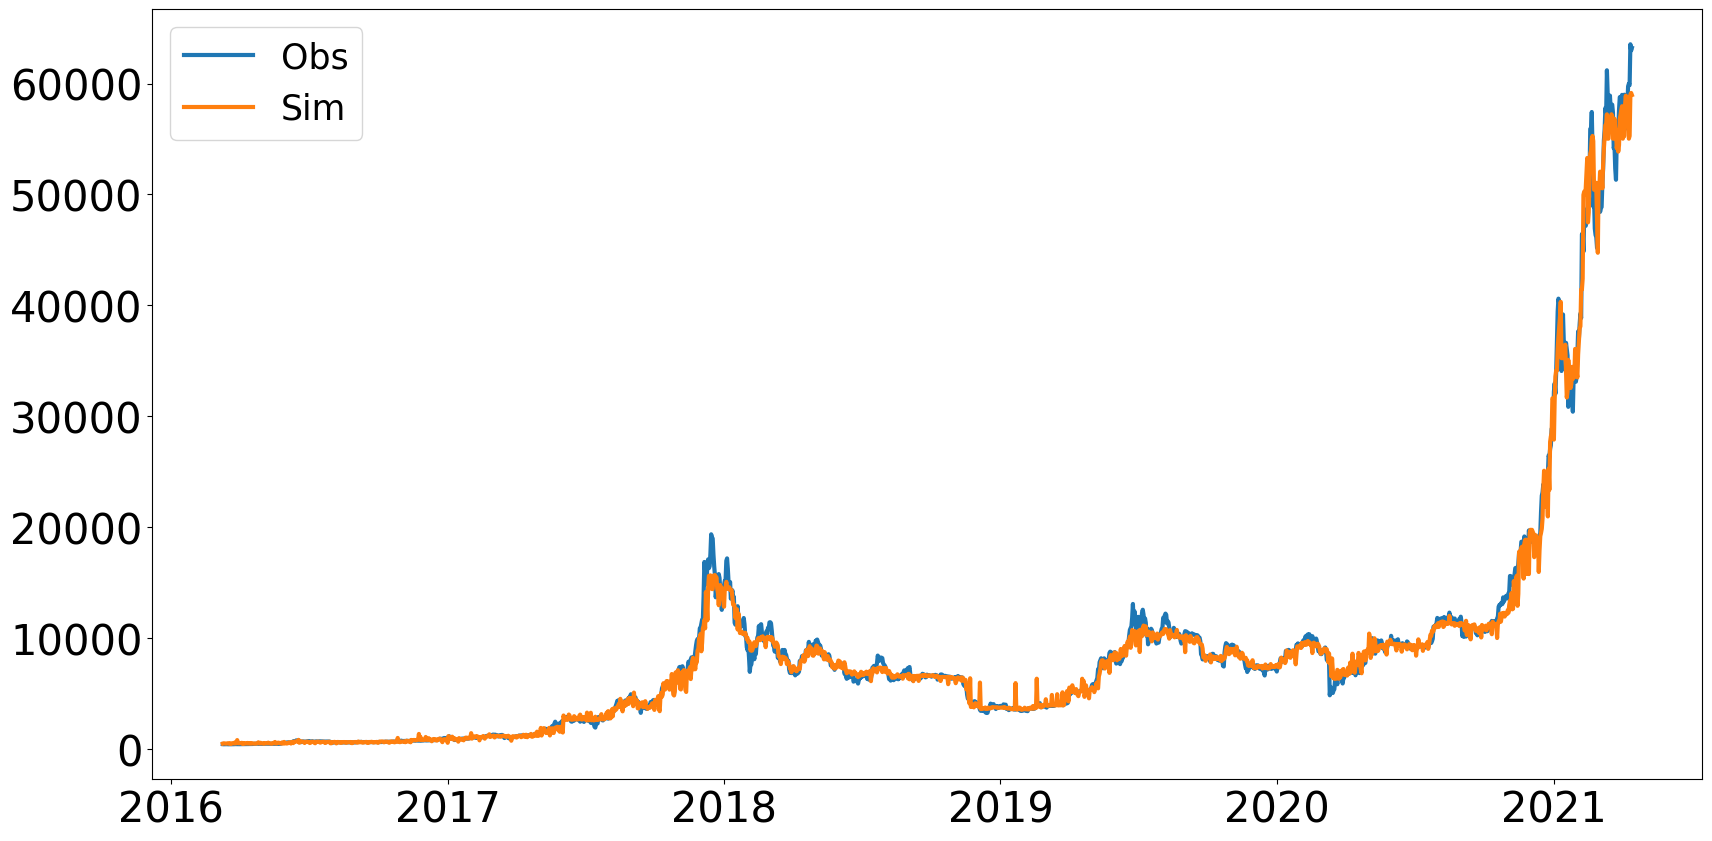

Root Mean Square Error (RMSE): 3585.073634185262
Mean Absolute Percentage Error (MAPE): 0.11561728043613352
r2 score: 0.27801987409398055



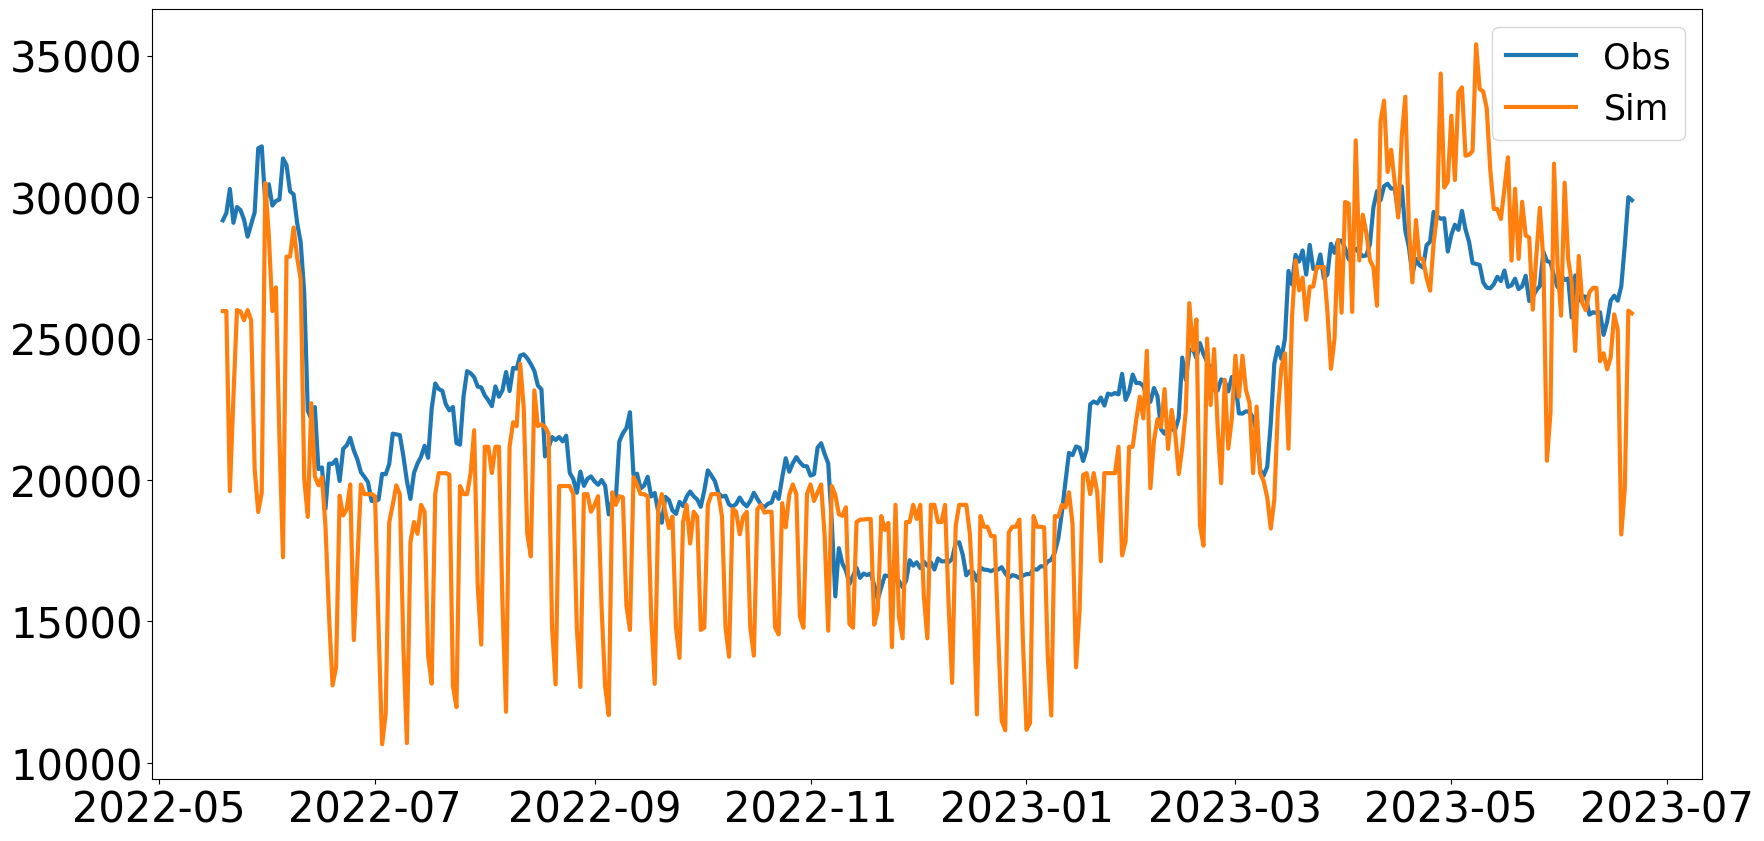

In [31]:
# manhattan
# for k in range(1,10):
k = 18
p = 1
neighbors = KNN(n_neighbors=k,p=p)
neighbors.fit(X_train, Y_train)

# train
prediction_knn = neighbors.predict(X_train)
metric(Y_train, prediction_knn)
plot(Y_train, prediction_knn, train_date)

# test
prediction_knn = neighbors.predict(X_test)
metric(Y_test, prediction_knn)
plot(Y_test, prediction_knn, test_date)

### **Euclide distance**

Root Mean Square Error (RMSE): 1622.1702631207086
Mean Absolute Percentage Error (MAPE): 0.09895573311154043
r2 score: 0.9772255411741548



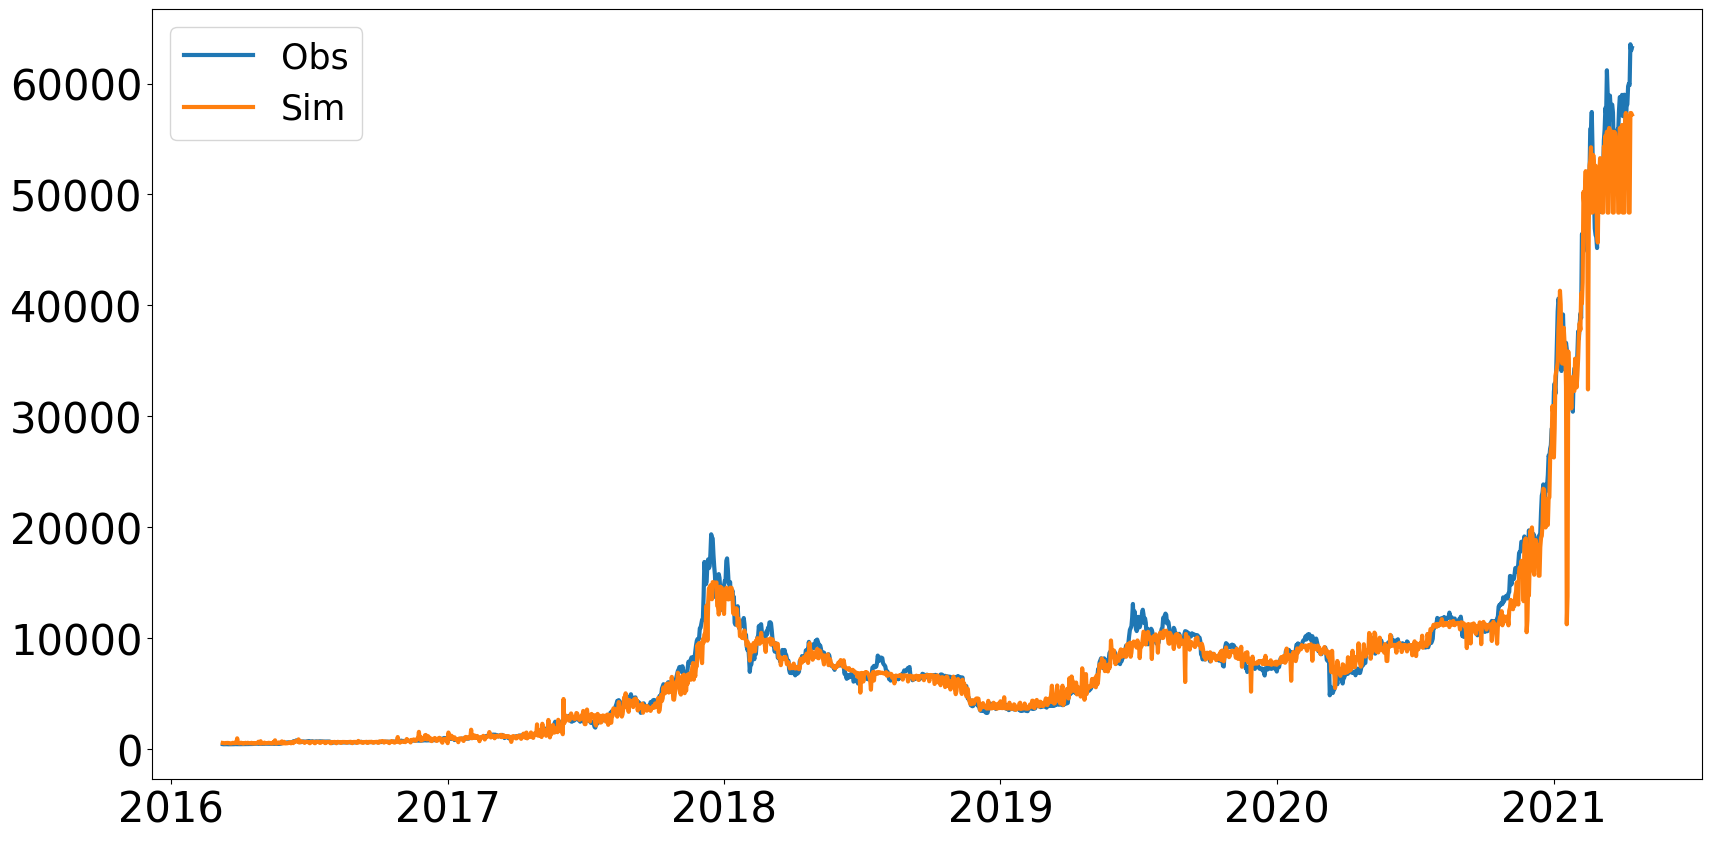

Root Mean Square Error (RMSE): 4652.314796633427
Mean Absolute Percentage Error (MAPE): 0.14715625939561514
r2 score: -0.21581436227447415



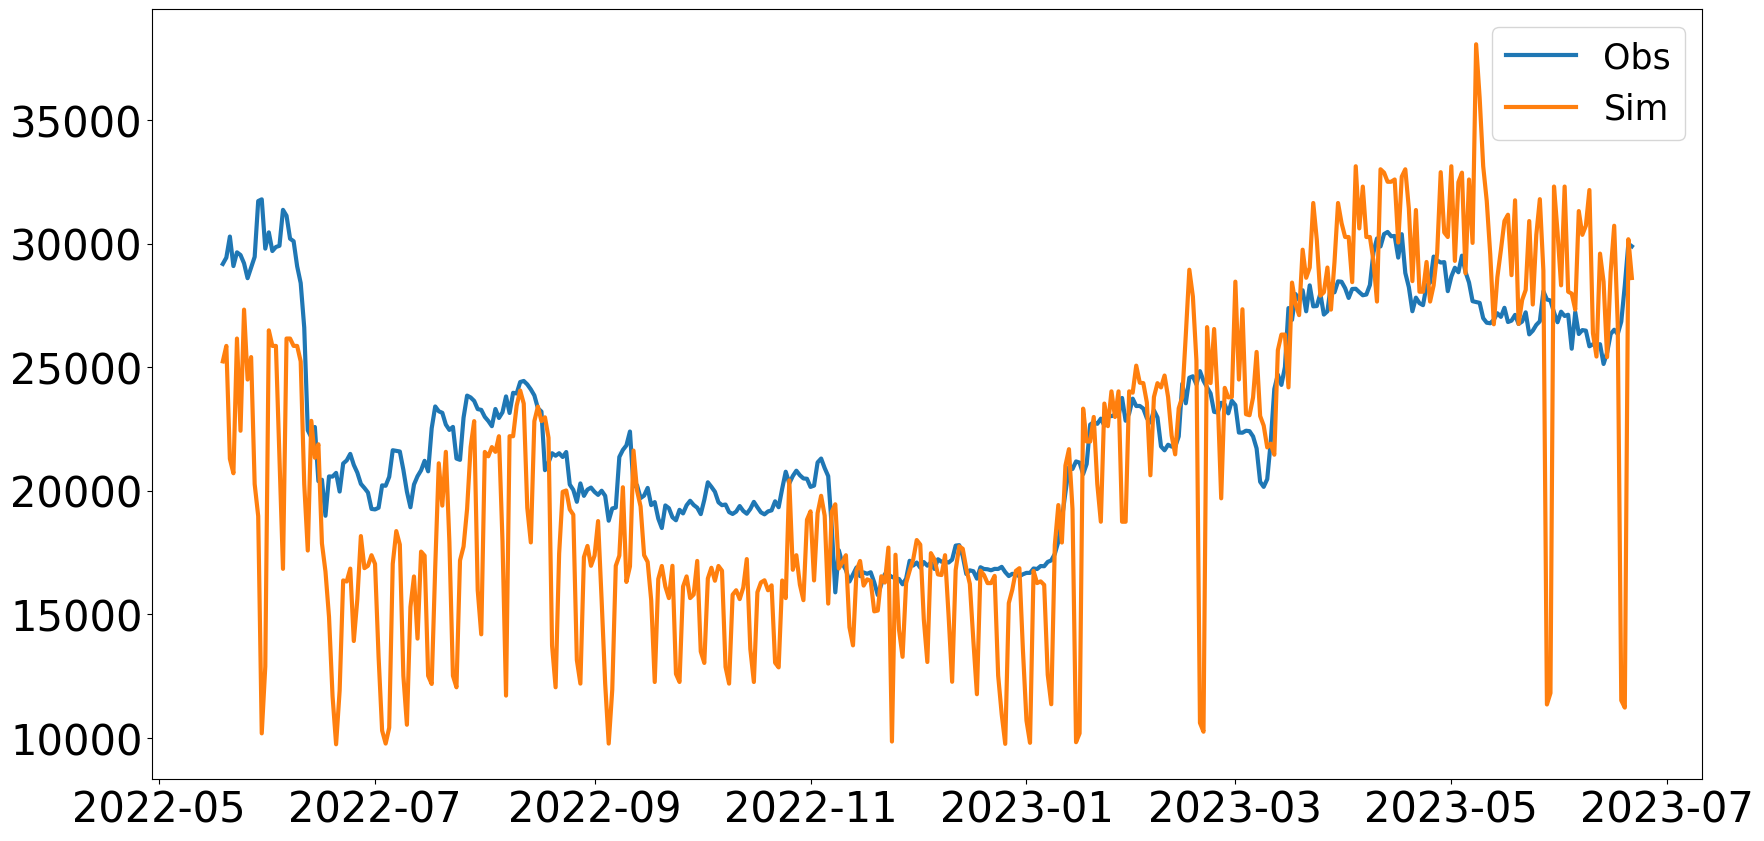

In [32]:
# euclide

k = 29
p = 2
neighbors = KNN(n_neighbors=k,p=p)
neighbors.fit(X_train, Y_train)

# train
prediction_knn = neighbors.predict(X_train)
metric(Y_train, prediction_knn)
plot(Y_train, prediction_knn, train_date)

# test
prediction_knn = neighbors.predict(X_test)
metric(Y_test, prediction_knn)
plot(Y_test, prediction_knn, test_date)